# City of Philadelphia Licenses and Inspections Appeals

The dataset contains decisions of Philadelphia Licenses and Inspections Appeal Board. The dataset contains 28869 records and 37 columns.

Several columns such as Appeal Grounds, Related Permits and Proviso are in Natural Language format. 

Source: https://www.opendataphilly.org/dataset/license-and-inspections-appeals/resource/b721ad52-9e27-46d2-b494-6bf0ef1c7603?inner_span=True

### I would like to research the relationship of the board decision stored in the column 'decision' and other values in the dataset such as Appeal Grounds(NL), Related Permits(NL), Proviso(NL) and well as property address(geospatial).


### Loading necessary packages

In [79]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline
from pandas_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn import metrics #metrics module

hypertable=[]

### Load and review the data

In [2]:
#Database URL
url = 'https://phl.carto.com/api/v2/sql?q=SELECT+*,+ST_Y(the_geom)+AS+lat,+ST_X(the_geom)+AS+lng+FROM+appeals&filename=appeals&format=csv&skipfields=cartodb_id'
#Initial Dataset load
df = pd.read_csv(url, low_memory=False)

In [3]:
#Sample data
df.head()

,the_geom,the_geom_webmercator,objectid,addressobjectid,address,unit_type,unit_num,zip,opa_account_num,parcel_id_num,...,scheduleddate,decision,meetingresult,proviso,decisiondate,systemofrecord,geocode_x,geocode_y,lat,lng
0,0101000020E610000037BAFB2B1DC352C03A158AB3C90A...,0101000020110F000083B7668792DE5FC1D7531E50DD9B...,28869,716319.0,8940 KREWSTOWN RD,NaN,118,19115-4517,888630077.0,646106,...,2010-05-04 13:15:00,MOOT,NaN,COMPLIED,2010-05-04 00:00:00,HANSEN,2.724252e+06,285119.162422,40.084280,-75.048656
1,0101000020E61000003690253716C852C06DEBA50163FD...,0101000020110F00008ED1ECEB04E75FC16710A3FAFF8C...,28870,628798.0,2300 E YORK ST,NaN,NaN,19125-2120,313145500.0,363094,...,2009-10-28 17:00:00,GRANTED,NaN,NaN,2009-10-28 00:00:00,HANSEN,2.703654e+06,246341.440497,39.979584,-75.126356
2,0101000020E61000003C08EF26A0CB52C03BDF48F08D06...,0101000020110F0000E86105BF07ED5FC1EBBBD9912A97...,28871,531963.0,128 E SHARPNACK ST,NaN,NaN,19119-2237,221108000.0,313082,...,2009-12-29 13:15:00,MOOT,NaN,COMPLIED,2009-12-30 00:00:00,HANSEN,2.687406e+06,271965.871360,40.051207,-75.181650
3,0101000020E61000000E3A31E95AC552C0FDEF06071902...,0101000020110F000085E81E1561E25FC16F05D2083992...,28872,297984.0,4671 FRANKFORD AVE,NaN,NaN,19124-5827,871529760.0,565329,...,2009-10-06 09:30:00,GRANTED,NaN,NaN,2009-10-06 00:00:00,HANSEN,2.715205e+06,260100.891162,40.016389,-75.083674
4,0101000020E6100000926D2397A0CE52C05ED5D7D893FB...,0101000020110F0000A996150421F25FC15C0150B0FE8A...,28873,589254.0,5421 VINE ST,NaN,NaN,19139-2041,41034400.0,511115,...,2009-12-29 13:15:00,WITHDRAWN,NaN,NaN,2009-10-21 00:00:00,HANSEN,2.675173e+06,240360.419544,39.965449,-75.228552


In [4]:
#Number of rows and features
print("df.shape", df.shape)

df.shape (29558, 37)


In [5]:
#Column Names
df.columns

Index(['the_geom', 'the_geom_webmercator', 'objectid', 'addressobjectid',
       'address', 'unit_type', 'unit_num', 'zip', 'opa_account_num',
       'parcel_id_num', 'censustract', 'opa_owner', 'primaryappellant',
       'appellanttype', 'internaljobid', 'appealnumber', 'acceleratedappeal',
       'createddate', 'completeddate', 'relatedpermit', 'relatedcasefile',
       'appealstatus', 'appealtype', 'agendadescription', 'applicationtype',
       'meetingnumber', 'appealgrounds', 'scheduleddate', 'decision',
       'meetingresult', 'proviso', 'decisiondate', 'systemofrecord',
       'geocode_x', 'geocode_y', 'lat', 'lng'],
      dtype='object')

In [6]:
#General Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29558 entries, 0 to 29557
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   the_geom              28949 non-null  object 
 1   the_geom_webmercator  28949 non-null  object 
 2   objectid              29558 non-null  int64  
 3   addressobjectid       28988 non-null  float64
 4   address               28977 non-null  object 
 5   unit_type             98 non-null     object 
 6   unit_num              551 non-null    object 
 7   zip                   28977 non-null  object 
 8   opa_account_num       27728 non-null  float64
 9   parcel_id_num         28307 non-null  object 
 10  censustract           28949 non-null  float64
 11  opa_owner             28402 non-null  object 
 12  primaryappellant      29558 non-null  object 
 13  appellanttype         29019 non-null  object 
 14  internaljobid         27715 non-null  float64
 15  appealnumber       

&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;

***
### Clear out Null values

I am dropping records with Null value in Decision column. They represent less than 10% of the data. With the multitude of unique values in that column I can't decide what value I can replace it with.

In [7]:
df = df[~df['decision'].isna()]
df[df['systemofrecord'].isna()]

,the_geom,the_geom_webmercator,objectid,addressobjectid,address,unit_type,unit_num,zip,opa_account_num,parcel_id_num,...,scheduleddate,decision,meetingresult,proviso,decisiondate,systemofrecord,geocode_x,geocode_y,lat,lng


In [8]:
#df.nunique()/df.shape[0]
df[df['decision'].isna()].shape[0]/df.shape[0]

0.0

In [9]:
df[df['lat'].isna()].shape[0]

17

I'm dropping these as well.

In [10]:
df = df[~df['lat'].isna()]

&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;&#9644;

### Clean Zip column

In [11]:
pd.concat([df['zip'].astype('str').str.slice(0,5), df['zip'].astype('str').str.slice(6,10)],axis = 1)

,zip,zip
0,19115,4517
1,19125,2120
2,19119,2237
3,19124,5827
4,19139,2041
...,...,...
29551,19104,1605
29552,19125,3311
29553,19125,4141
29554,19147,2936


In [12]:
#(df['zip'].astype('str').str.slice(0,5) + df['zip'].astype('str').str.slice(6,10)).astype('int')
#df['zip'].astype('str').str.slice(0,5).astype('int')

In [13]:
#Percent of unique values per values per column
df.nunique()/df.shape[0]

the_geom                0.802210
the_geom_webmercator    0.802210
objectid                1.000000
addressobjectid         0.814007
address                 0.805197
unit_type               0.000149
unit_num                0.004331
zip                     0.487269
opa_account_num         0.775330
parcel_id_num           0.772344
censustract             0.014261
opa_owner               0.706600
primaryappellant        0.458112
appellanttype           0.000224
internaljobid           0.985253
appealnumber            1.000000
acceleratedappeal       0.000075
createddate             0.998581
completeddate           0.450459
relatedpermit           0.982379
relatedcasefile         0.000037
appealstatus            0.000299
appealtype              0.000224
agendadescription       0.000037
applicationtype         0.000187
meetingnumber           0.014747
appealgrounds           0.922945
scheduleddate           0.174755
decision                0.001120
meetingresult           0.000261
proviso   

In [14]:
df.dtypes

the_geom                 object
the_geom_webmercator     object
objectid                  int64
addressobjectid         float64
address                  object
unit_type                object
unit_num                 object
zip                      object
opa_account_num         float64
parcel_id_num            object
censustract             float64
opa_owner                object
primaryappellant         object
appellanttype            object
internaljobid           float64
appealnumber             object
acceleratedappeal        object
createddate              object
completeddate            object
relatedpermit            object
relatedcasefile          object
appealstatus             object
appealtype               object
agendadescription        object
applicationtype          object
meetingnumber            object
appealgrounds            object
scheduleddate            object
decision                 object
meetingresult            object
proviso                  object
decision

In [15]:
df['createddate'] = pd.to_datetime(df['createddate'])

In [16]:
df['completeddate'] = pd.to_datetime(df['completeddate'])
df['scheduleddate'] = pd.to_datetime(df['scheduleddate'])
df['decisiondate'] = pd.to_datetime(df['decisiondate'])

In [17]:
#Top examples of "appealgrounds"
df['appealgrounds'].value_counts().head(10)

PERMIT FOR TWO (2) FAMILY DWELLING IN AN EXISTING STRUCTURE.                                       110
PERMIT FOR A TWO (2) FAMILY DWELLING IN AN EXISTING STRUCTURE.                                      65
WE ARE APPEALING THE ISSUANCE OF BUILDING PERMIT #765070 FOR HEALTH AND ENVIRONMENTAL CONCERNS.     63
PERMIT FOR THREE (3) FAMILY DWELLING (MULTI-FAMILY DWELLING) IN AN EXISTING STRUCTURE.              56
PERMIT FOR A TWO(2) FAMILY DWELLING.                                                                55
PERMIT FOR A THREE(3) FAMILY DWELLING.                                                              51
PERMIT FOR A TWO(2) FAMILY DWELLING IN AN EXISTING STRUCTURE.                                       37
PERMIT FOR A TWO (2) FAMILY DWELLING.                                                               36
PERMIT FOR A TWO FAMILY DWELLING.                                                                   35
PERMIT FOR TWO (2) FAMILY DWELLING IN AN EXISTING STRUCTURE              

In [18]:
#Top examples of "relatedpermit"
df['relatedpermit'].value_counts().head(10)

Description of Project:  SM/LRG FOOD ESTAB\n  APPEAL TYPES==> \nAPPEAL TYPE: LI-REFGRNT  \n\n  BOARD DECISIONS==> \nDECISION: CONTINUED  DECDATE: 16-OCT-18  PROVISO:   \n\n  COURT APPEALS==> \n                                                                                                                                                                                                  29
Description of Project:  BUILDING PERMIT #765070\n  APPEAL TYPES==> \nAPPEAL TYPE: AGAINSTL&I  \n\n  BOARD DECISIONS==> \nDECISION: AFFIRMED  DECDATE: 28-JUL-17  PROVISO:   \n\n  COURT APPEALS==> \n                                                                                                                                                                                             28
Description of Project:  PWD\n  APPEAL TYPES==> \nAPPEAL TYPE: WATER  \n\n  BOARD DECISIONS==> \n\n  COURT APPEALS==> \n                                                                                                    

In [19]:
#Top value of "proviso"
df['proviso'].value_counts().head(10)

COMPLIED                                                          1751
FOR WANT OF APPEARANCE                                             737
*****CASE WITHDRAWN.*****                                          402
*****CASE DISMISSED.*****                                          163
*****CASE DISMISSED - PUT INTO ENFORCEMENT.*****                   109
60 DAY STAY OF ENFORCEMENT                                         101
90 DAY STAY OF ENFORCEMENT                                          85
30 DAY STAY OF ENFORCEMENT                                          58
WITHOUT PREJUDICE;  CITY HAS THE RIGHT TO RE-ISSUE VIOLATIONS.      54
120 DAY STAY OF ENFORCEMENT                                         53
Name: proviso, dtype: int64

In [20]:
#Breakdown by decision
df['decision'].value_counts()

GRANTED                  8436
GRANTED/PROV             6260
WITHDRAWN                2420
MOOT                     2283
AFFIRMED                 1956
DENIED                   1796
APPROVED                 1554
DISMISSED                 936
Complete                  348
SUSTAINED                 255
CONTINUED                 224
DENIED/PROV                69
ADMIN/REVIEW               63
DISMI/ENFORC               42
REMAND                     38
Dismissed / Withdrawn      38
HELD                       17
NEWHEARNOT                 12
HELD/INFO                   9
BOARDAKNOWL                 7
Continued                   5
REFUSED                     3
Cancelled                   3
LATE-APPRVD                 3
LATE-DENIED                 2
REVISED                     2
NEWHEARYES                  2
ISSUED                      1
Rescheduled                 1
RESCHEDULE                  1
Name: decision, dtype: int64

In [21]:
# Save the values
df['decisionsv']=df['decision']

In [22]:
df[(df['decision'].str.contains('/PROV') == True) & (df['proviso'].isna() == True)][['decision', 'proviso']]

,decision,proviso
3220,DENIED/PROV,NaN
25957,GRANTED/PROV,NaN


Even though there are only two records, it appears that /PROV in the 'decision' field doesn't mean that there is value in the field 'proviso'

In [23]:
df[~(df['decision'].str.contains('/PROV') == True) & (df['proviso'].isna() == False)][['decision', 'proviso']]

,decision,proviso
0,MOOT,COMPLIED
2,MOOT,COMPLIED
10,AFFIRMED,CITY WILL STAY ENFORCEMENT ACTION FOR 90 DAYS.
11,MOOT,COMPLIED
14,AFFIRMED,CITY WILL STAY ENFORCEMENT FOR 60 DAYS TO SECU...
...,...,...
29493,Complete,"With Proviso: revised plans, 1 page, approved..."
29511,AFFIRMED,FOR WANT OF APPEARANCE
29521,AFFIRMED,FOR WANT OF APPEARANCE
29522,Complete,With proviso: Approved use is ground floor com...


not having /PROV in 'decision' field doesn't mean no value in 'provision'

### Remove /PROV value from decision column and store it as a flag in a separate field

In [24]:
# Add new field prvFlag to store "/PROV" from decision
df['provFlag'] = (df['decision'].str.contains('/PROV') == True).astype('int')

In [25]:
df[df['decision'].str.contains('/PROV')]['decision'].str.len().unique()

array([12, 11], dtype=int64)

In [26]:
def stripProviso (decision):
    if '/PROV' in decision:
        strLength = len(decision)
        return decision[0: strLength-5]
    else:
        return decision

In [27]:
df['decision'] = df['decision'].apply(stripProviso)

In [28]:
df[['decision','decisionsv','provFlag']]

,decision,decisionsv,provFlag
0,MOOT,MOOT,0
1,GRANTED,GRANTED,0
2,MOOT,MOOT,0
3,GRANTED,GRANTED,0
4,WITHDRAWN,WITHDRAWN,0
...,...,...,...
29551,Complete,Complete,0
29552,Complete,Complete,0
29553,Complete,Complete,0
29554,Complete,Complete,0


### Change case for all decisions to lower case

In [29]:
df['decision'] = df['decision'].str.lower()

### Combine dismissed and withdrawn as dismissed

In [30]:
sorted(df[df['decision'].str.contains('dismi')]['decision'].unique())

['dismi/enforc', 'dismissed', 'dismissed / withdrawn']

In [31]:
def dismissed (decision):
    if 'dismi' in decision or decision == 'withdrawn':
        return 'dismissed'
    else:
        return decision

In [32]:
df['decision'] = df['decision'].apply(dismissed)

In [33]:
sorted(df[df['decision'].str.contains('dismi')]['decision'].unique())

['dismissed']

In [34]:
sorted(df['decision'].unique())

['admin/review',
 'affirmed',
 'approved',
 'boardaknowl',
 'cancelled',
 'complete',
 'continued',
 'denied',
 'dismissed',
 'granted',
 'held',
 'held/info',
 'issued',
 'late-apprvd',
 'late-denied',
 'moot',
 'newhearnot',
 'newhearyes',
 'refused',
 'remand',
 'reschedule',
 'rescheduled',
 'revised',
 'sustained']

In [35]:
pd.set_option('display.max_colwidth', None)
df[df['decision'] == 'HELD/INFO'].head(5)

,the_geom,the_geom_webmercator,objectid,addressobjectid,address,unit_type,unit_num,zip,opa_account_num,parcel_id_num,...,meetingresult,proviso,decisiondate,systemofrecord,geocode_x,geocode_y,lat,lng,decisionsv,provFlag


In [36]:
df[df['proviso'].isnull() == True]
df[(df['decision'].str.contains("PROV") == True) & (df['decision'] != 'APPROVED')  & (df['proviso'].isnull() == True)]

,the_geom,the_geom_webmercator,objectid,addressobjectid,address,unit_type,unit_num,zip,opa_account_num,parcel_id_num,...,meetingresult,proviso,decisiondate,systemofrecord,geocode_x,geocode_y,lat,lng,decisionsv,provFlag


In [37]:
df[df['meetingresult'].isnull() == False]

,the_geom,the_geom_webmercator,objectid,addressobjectid,address,unit_type,unit_num,zip,opa_account_num,parcel_id_num,...,meetingresult,proviso,decisiondate,systemofrecord,geocode_x,geocode_y,lat,lng,decisionsv,provFlag
49,0101000020E610000012821833D5CA52C07F2461F5DAFC4340,0101000020110F0000B64DCD02AFEB5FC12485D831698C5241,29172,127982554.0,2000 SEYBERT ST,NaN,NaN,19121-4817,291053500.0,37094,...,Granted,NaN,2020-09-10 19:28:54,ECLIPSE,2.691679e+06,244475.379312,39.975432,-75.169263,Complete,0
236,0101000020E61000004D7BC1E443CA52C0663B07BF14FC4340,0101000020110F000075A8AD31B8EA5FC12ED763878D8B5241,29357,15453232.0,842 N BROAD ST,NaN,NaN,19130-2234,882885597.0,464788,...,Granted,NaN,2020-10-09 11:02:37,ECLIPSE,2.694228e+06,242345.549053,39.969383,-75.160394,Complete,0
271,0101000020E6100000B692B43A1FC952C0593D2949E3FC4340,0101000020110F000010520913C7E85FC19B51786C728C5241,29386,15456898.0,1618 GERMANTOWN AVE,NaN,NaN,19122-3017,183160510.0,436927,...,Granted,"With proviso: (1) revised plans, 1 pg., approved today.",2020-10-14 11:31:12,ECLIPSE,2.699165e+06,244787.950990,39.975686,-75.142531,Complete,0
309,0101000020E6100000525BD8498ECA52C08A6C64CDACF94340,0101000020110F0000A7D9AD8F36EB5FC1AA35D00AE3885241,29426,15795392.0,1416 CHESTNUT ST,NaN,NaN,19102-2505,883421500.0,183272,...,Granted,NaN,2020-09-23 10:17:09,ECLIPSE,2.693156e+06,235463.747317,39.950586,-75.164935,Complete,0
338,0101000020E6100000715EB5F72CC652C020C99AA4A6FF4340,0101000020110F00005B378CE2C5E35FC14234D680828F5241,29451,15696515.0,3701 SEPVIVA ST,NaN,NaN,19137-1017,884201350.0,100870,...,Granted,NaN,2020-10-14 11:14:45,ECLIPSE,2.711825e+06,253032.358401,39.997273,-75.096495,Complete,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29551,0101000020E610000034D7E5E67ECC52C0E057520FB4FB4340,0101000020110F00000B58F61B82EE5FC129337C62228B5241,58373,15802209.0,712 N 36TH ST,NaN,NaN,19104-1605,243077100.0,272349,...,Denied,NaN,2020-10-05 15:18:14,ECLIPSE,2.684495e+06,240986.657703,39.966432,-75.195245,Complete,0
29552,0101000020E6100000A50A88B628C852C0D1CD112659FC4340,0101000020110F0000ECD4735724E75FC122B92D55D98B5241,58477,15662423.0,537 E GIRARD AVE,NaN,NaN,19125-3311,871523930.0,261022,...,Granted,NaN,2020-10-23 11:44:28,ECLIPSE,2.703425e+06,243377.803376,39.971471,-75.127485,Complete,0
29553,0101000020E6100000DAFE519395C852C0C50822ECA2FB4340,0101000020110F00005A106541DDE75FC12B62E4640F8B5241,58478,127853943.0,965 FRANKFORD AVE,NaN,NaN,19125-4141,885997521.0,168340,...,Granted,NaN,2020-10-23 11:30:46,ECLIPSE,2.701624e+06,241297.655440,39.965909,-75.134129,Complete,0
29554,0101000020E610000014382E70D6C952C0C06351904AF84340,0101000020110F00008060E945FEE95FC190816F9E5A875241,58479,15436431.0,620 CLYMER ST,NaN,NaN,19147-2936,22017000.0,154044,...,Granted,NaN,2020-09-08 21:32:06,ECLIPSE,2.696417e+06,231619.655826,39.939776,-75.153713,Complete,0


In [38]:
(df['decision'] + " - " + df['meetingresult']).value_counts()

complete - Granted       320
dismissed - Withdrawn     36
complete - Denied         18
complete - Withdrawn       4
cancelled - Withdrawn      2
complete - Dismissed       2
complete - Approved        2
complete - Refused         2
cancelled - Revised        1
continued - Granted        1
rescheduled - Refused      1
dtype: int64

In [39]:
df[(df['decision']=='Complete') & (df['meetingresult'].isnull() == True)]

,the_geom,the_geom_webmercator,objectid,addressobjectid,address,unit_type,unit_num,zip,opa_account_num,parcel_id_num,...,meetingresult,proviso,decisiondate,systemofrecord,geocode_x,geocode_y,lat,lng,decisionsv,provFlag


In [40]:
df[(df['decision']=='GRANTED') & (df['meetingresult'].isnull() == False)]

,the_geom,the_geom_webmercator,objectid,addressobjectid,address,unit_type,unit_num,zip,opa_account_num,parcel_id_num,...,meetingresult,proviso,decisiondate,systemofrecord,geocode_x,geocode_y,lat,lng,decisionsv,provFlag


In [41]:
df['systemofrecord'].value_counts()

HANSEN     26391
ECLIPSE      395
Name: systemofrecord, dtype: int64

In [42]:
# I want to see if the two system of records overlap
for sysname in df['systemofrecord'].unique():
    print(sysname)
    print(df[df['systemofrecord']==sysname]['createddate'].agg(['min','max']))

HANSEN
min   2007-01-22 09:41:00
max   2020-03-09 16:19:20
Name: createddate, dtype: datetime64[ns]
ECLIPSE
min   2018-02-20 10:48:46
max   2020-09-21 10:00:39
Name: createddate, dtype: datetime64[ns]


In [43]:
df[(df['systemofrecord']=='HANSEN') & (df['meetingresult'].isnull() == False)]

,the_geom,the_geom_webmercator,objectid,addressobjectid,address,unit_type,unit_num,zip,opa_account_num,parcel_id_num,...,meetingresult,proviso,decisiondate,systemofrecord,geocode_x,geocode_y,lat,lng,decisionsv,provFlag


In [44]:
df[(df['systemofrecord']=='ECLIPSE') & (df['decision'].isnull() == False) & (df['meetingresult'].isnull() == True)]

,the_geom,the_geom_webmercator,objectid,addressobjectid,address,unit_type,unit_num,zip,opa_account_num,parcel_id_num,...,meetingresult,proviso,decisiondate,systemofrecord,geocode_x,geocode_y,lat,lng,decisionsv,provFlag
23290,0101000020E610000078EC83545CCB52C0FCF5F84046F84340,0101000020110F000086CB348B94EC5FC1F9FF40D855875241,52899,15696117.0,2031 WASHINGTON AVE,NaN,NaN,19146-2632,884006315.0,137226,...,NaN,NaN,2020-06-30 18:49:58,ECLIPSE,2.689748e+06,231376.510551,39.939644,-75.177510,Continued,0
23456,0101000020E6100000ADFD74DAEBBD52C002EB9FFD050B4440,0101000020110F00000F68388CC0D55FC1D33B053D209C5241,52800,159412601.0,4501 WOODHAVEN RD,#,1B,19154-3145,882691010.0,495596,...,NaN,NaN,2020-07-16 12:10:37,ECLIPSE,2.746923e+06,286493.835007,40.086120,-74.967520,Dismissed / Withdrawn,0
23711,0101000020E6100000626DE93412CC52C084945E7172FD4340,0101000020110F0000D998B97AC9ED5FC1915F8C16118D5241,52393,15830744.0,1501 N 33RD ST,NaN,NaN,19121-3513,292315605.0,90942,...,NaN,NaN,2020-09-30 17:01:36,ECLIPSE,2.686209e+06,246000.873419,39.980055,-75.188611,Continued,0
24427,0101000020E61000008E77029EC0CB52C06B89357ADFFD4340,0101000020110F0000F84438E43EED5FC147AFC0F0898D5241,53082,136875946.0,3008 CLIFFORD ST,NaN,NaN,19121-2503,884460495.0,529385,...,NaN,NaN,2020-08-21 11:34:37,ECLIPSE,2.687569e+06,247253.010811,39.983382,-75.183631,Continued,0
25096,0101000020E6100000344ACB0F84C952C0A823E214C4F74340,0101000020110F00001C482A5972E95FC17F8016A8C5865241,54121,128584849.0,925 S 3RD ST,NaN,NaN,19147-4238,21403910.0,144296,...,NaN,NaN,2020-09-14 16:42:10,ECLIPSE,2.697870e+06,230166.748507,39.935671,-75.148685,Continued,0
25252,0101000020E6100000DCB07AA8FDC952C08DCE794002FA4340,0101000020110F0000338D5EE440EA5FC18F8546B641895241,54159,128762194.0,43 N 10TH ST,NaN,NaN,19107-1311,883704410.0,336648,...,NaN,NaN,2020-05-14 09:46:22,ECLIPSE,2.695602e+06,236485.840297,39.953194,-75.156107,Dismissed / Withdrawn,0


It appears that there are two system of records. 
- HANSEN records have value of "decision" in upper case and have null valuye for "meetingresult"
- ECLIPSE records have value of "decision" in lower case and except for 8 records have additional value in the "meetingresult" column.

In [45]:
df[(df['decision']=='AFFIRMED') & (~df['proviso'].isnull())].head(2).T

""
the_geom
the_geom_webmercator
objectid
addressobjectid
address
unit_type
unit_num
zip
opa_account_num
parcel_id_num


In [46]:
df['appealstatus'].value_counts()

CLOSED                   14331
OPEN                     12060
In Process                 291
Completed                   75
Waiting Period              20
Dismissed / Withdrawn        7
Closed                       1
Prepare Meeting              1
Name: appealstatus, dtype: int64

In [47]:
df[df['appealstatus'].isin(['CLOSED','Completed','Dismissed / Withdrawn','Closed'])]['decision'].value_counts()

granted         9542
dismissed       2291
denied          1360
approved         899
affirmed         101
moot              84
complete          75
sustained         16
admin/review      11
continued          8
newhearnot         8
held/info          5
boardaknowl        5
refused            3
revised            2
late-denied        1
held               1
issued             1
remand             1
Name: decision, dtype: int64

In [48]:
df[df['decision'].isna() ][['appealstatus','appellanttype','createddate','agendadescription','decision','decisiondate']]

,appealstatus,appellanttype,createddate,agendadescription,decision,decisiondate


In [49]:
#df.nunique()/df.shape[0]
df[df['decision'].isna()].shape[0]/df.shape[0]

0.0

In [50]:
df[['lat','lng']].agg([min,max, 'mean']).T

,min,max,mean
lat,39.880338,40.137052,39.984493
lng,-75.274212,-74.961283,-75.153706


In [51]:
#Save Philadelphia Center City Latitude and Longitude.
ccLat = 39.952583
ccLng = -75.165222

In [52]:
#create "distance" from center city 
df['fromCC'] = ((df['lat']-ccLat)**2 + (df['lng']-ccLng)**2)**0.5
df['latfromCC']=df['lat']-ccLat
df['lngfromCC']=df['lng']-ccLng

In [53]:
df['fromCC'].agg(['max','min'])

max    0.252279
min    0.000070
Name: fromCC, dtype: float64

In [54]:
df[['lat','geocode_y']].corr()

,lat,geocode_y
lat,1.000000,0.999753
geocode_y,0.999753,1.000000


In [55]:
df[['lng','geocode_x']].corr()

,lng,geocode_x
lng,1.000000,0.999597
geocode_x,0.999597,1.000000


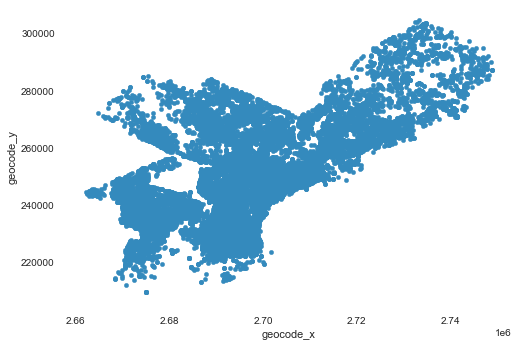

In [56]:
df.plot.scatter('geocode_x','geocode_y')

In [86]:
try:
    os.mkdir('images')
except:
    print('directory already exists')

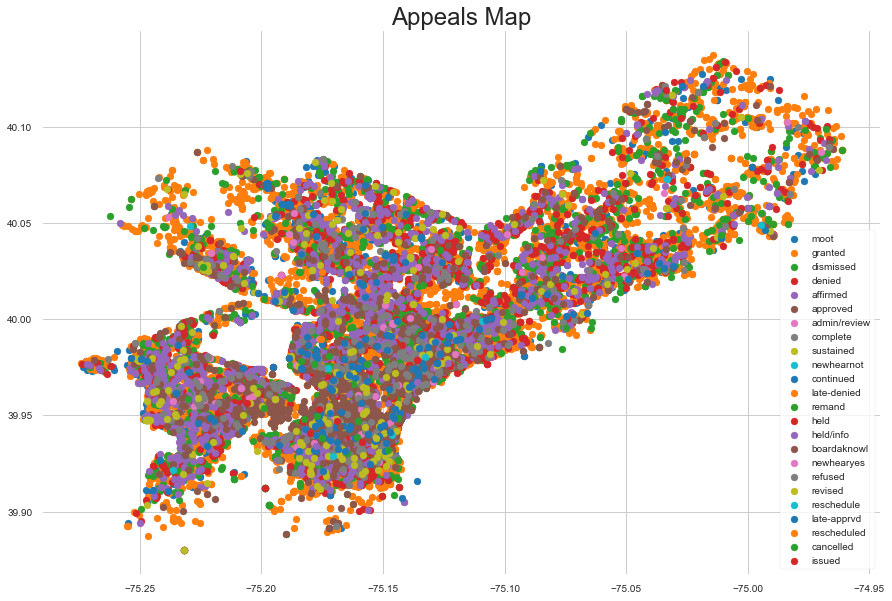

In [89]:
plt.axes
plt.figure(figsize=(15,10))
plt.title('Appeals Map', size=24)
plt.rc('font', size=24)

for decision in df['decision'].unique():
    dfscat = df[df['decision'] == decision]
    plt.scatter(dfscat['lng'], dfscat['lat'], marker = 'o', label = decision)
    
plt.grid('on')
plt.legend()
plt.rc('font', size=18)
plt.savefig('images/appeals_map.png',bbox_inches='tight')
plt.show()


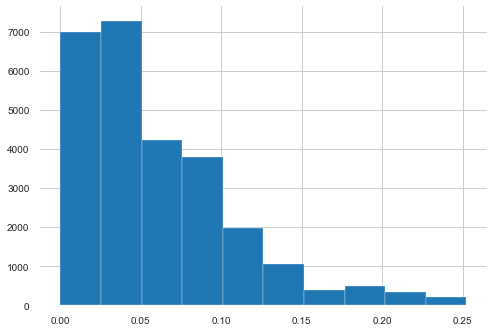

In [60]:
#Distance from CC
df['fromCC'].hist()

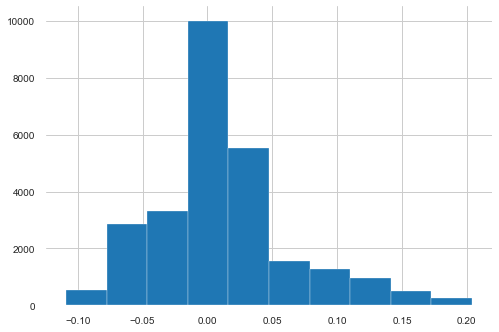

In [61]:
#Longtitude from CC
df['lngfromCC'].hist()

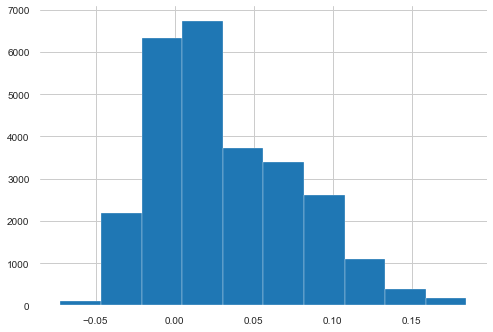

In [62]:
#Latitude from CC
df['latfromCC'].hist()

### myMetrics Function for model testing

In [63]:
# Create metrics function to check metrics for different models

def myMetrics(model=None, features=None, X_test=None, y_true_test=None, X_train=None, y_true_train=None):
    
    hypertablerow={}
    hypertablerow['model']=model.__class__.__name__
    hypertablerow['features']=features

    X_train_temp = X_train[features]
    X_test_temp = X_test[features]  
    print(X_train_temp.columns)
    model.fit(X_train_temp,y_train)
    
    y_pred_test = model.predict(X_test_temp)
    y_pred_train = model.predict(X_train_temp)


    # Accuracy
    hypertablerow['accuracy_test'] = metrics.accuracy_score(y_true_test, y_pred_test)
    print('accuracy_test', hypertablerow['accuracy_test'])
    hypertablerow['accuracy_train'] = metrics.accuracy_score(y_true_train, y_pred_train)
    print('accuracy_train', hypertablerow['accuracy_train'])
    # Precision
    hypertablerow['precision_test'] = metrics.precision_score(y_true_test, y_pred_test, average = 'weighted')
    #print('precision_test', hypertablerow['precision_test'])
    hypertablerow['precision_train'] = metrics.precision_score(y_true_train, y_pred_train, average = 'weighted')
    #print('precision_train', hypertablerow['precision_train'])
    # Recall
    hypertablerow['recall_test'] = metrics.recall_score(y_true_test, y_pred_test, average = 'weighted')
    #print('recall_test', hypertablerow['recall_test'])
    hypertablerow['recall_train'] = metrics.recall_score(y_true_train, y_pred_train, average = 'weighted')
    #print('recall_train', hypertablerow['recall_train'])

    hypertable.append(hypertablerow)
    pd.Series(hypertablerow)
    return hypertablerow

In [64]:
# Create "dummy" variables for systemofrecord columns
df = pd.concat([df, pd.get_dummies(df['systemofrecord'])], axis=1)
df.columns

Index(['the_geom', 'the_geom_webmercator', 'objectid', 'addressobjectid',
       'address', 'unit_type', 'unit_num', 'zip', 'opa_account_num',
       'parcel_id_num', 'censustract', 'opa_owner', 'primaryappellant',
       'appellanttype', 'internaljobid', 'appealnumber', 'acceleratedappeal',
       'createddate', 'completeddate', 'relatedpermit', 'relatedcasefile',
       'appealstatus', 'appealtype', 'agendadescription', 'applicationtype',
       'meetingnumber', 'appealgrounds', 'scheduleddate', 'decision',
       'meetingresult', 'proviso', 'decisiondate', 'systemofrecord',
       'geocode_x', 'geocode_y', 'lat', 'lng', 'decisionsv', 'provFlag',
       'fromCC', 'latfromCC', 'lngfromCC', 'ECLIPSE', 'HANSEN'],
      dtype='object')

In [65]:
# Declare an explanatory variable, and assign some data to it 
#X = df[['ECLIPSE', 'HANSEN']]
X = df.drop(['decision'], axis=1)

# Declare a response variable, the decision column of the df 
y = df['decision'] 

In [66]:
# import the preprocessing package
from sklearn import preprocessing

# Call the train_test_split() function
# Declare four variables, X_train, X_test, y_train and y_test separated by commas 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [67]:
from sklearn import svm
model = svm.LinearSVC() # Linear Kernel
features=['ECLIPSE', 'HANSEN']
hypertablerow = myMetrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test)

Index(['ECLIPSE', 'HANSEN'], dtype='object')
accuracy_test 0.5575630879498282
accuracy_train 0.5629946737020259


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
model = svm.LinearSVC() # Linear Kernel
features=['ECLIPSE', 'HANSEN','fromCC', 'latfromCC', 'lngfromCC']
hypertablerow = myMetrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test)

Index(['ECLIPSE', 'HANSEN', 'fromCC', 'latfromCC', 'lngfromCC'], dtype='object')
accuracy_test 0.5575630879498282
accuracy_train 0.5629946737020259


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
model = svm.LinearSVC() # Linear Kernel
features=['ECLIPSE', 'HANSEN','fromCC', 'latfromCC', 'lngfromCC']
hypertablerow = myMetrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test)

Index(['ECLIPSE', 'HANSEN', 'fromCC', 'latfromCC', 'lngfromCC'], dtype='object')
accuracy_test 0.5575630879498282
accuracy_train 0.5629946737020259


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
model = svm.LinearSVC() # Linear Kernel
features=['ECLIPSE','fromCC', 'latfromCC', 'lngfromCC']
hypertablerow = myMetrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test)

Index(['ECLIPSE', 'fromCC', 'latfromCC', 'lngfromCC'], dtype='object')
accuracy_test 0.5575630879498282
accuracy_train 0.5629946737020259


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
model = svm.LinearSVC() # Linear Kernel
features=['ECLIPSE','fromCC', 'latfromCC', 'lngfromCC', 'censustract']
hypertablerow = myMetrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test)

Index(['ECLIPSE', 'fromCC', 'latfromCC', 'lngfromCC', 'censustract'], dtype='object')


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy_test 0.1648499328057339
accuracy_train 0.16302454079346906


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
model = svm.SVC(kernel='linear') # Linear Kernel
features=['ECLIPSE', 'HANSEN','fromCC', 'latfromCC', 'lngfromCC']
hypertablerow = myMetrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test)

Index(['ECLIPSE', 'HANSEN', 'fromCC', 'latfromCC', 'lngfromCC'], dtype='object')
accuracy_test 0.5575630879498282
accuracy_train 0.5629946737020259


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
model = svm.SVC(kernel='poly') # Linear Kernel
features=['ECLIPSE', 'HANSEN','fromCC', 'latfromCC', 'lngfromCC']
hypertablerow = myMetrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test)

Index(['ECLIPSE', 'HANSEN', 'fromCC', 'latfromCC', 'lngfromCC'], dtype='object')
accuracy_test 0.5575630879498282
accuracy_train 0.5629946737020259


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
model = svm.SVC(kernel='sigmoid') # Linear Kernel
features=['ECLIPSE', 'HANSEN','fromCC', 'latfromCC', 'lngfromCC']
hypertablerow = myMetrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test)

Index(['ECLIPSE', 'HANSEN', 'fromCC', 'latfromCC', 'lngfromCC'], dtype='object')
accuracy_test 0.5575630879498282
accuracy_train 0.5629946737020259


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
model = svm.SVC(kernel='rbf') # Linear Kernel
features=['ECLIPSE', 'HANSEN','fromCC', 'latfromCC', 'lngfromCC']
hypertablerow = myMetrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test)

Index(['ECLIPSE', 'HANSEN', 'fromCC', 'latfromCC', 'lngfromCC'], dtype='object')
accuracy_test 0.5575630879498282
accuracy_train 0.5629946737020259


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=10)
features=['ECLIPSE', 'HANSEN','fromCC', 'latfromCC', 'lngfromCC']
hypertablerow = myMetrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test)

Index(['ECLIPSE', 'HANSEN', 'fromCC', 'latfromCC', 'lngfromCC'], dtype='object')
accuracy_test 0.5385993728535164
accuracy_train 0.5984369555478123


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
features=['ECLIPSE', 'HANSEN','fromCC', 'latfromCC', 'lngfromCC']
hypertablerow = myMetrics(model=model,features=features,X_train=X_train,y_true_train=y_train,X_test=X_test,y_true_test=y_test)

Index(['ECLIPSE', 'HANSEN', 'fromCC', 'latfromCC', 'lngfromCC'], dtype='object')
accuracy_test 0.5385993728535164
accuracy_train 0.5984369555478123


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


...

In [78]:
pd.DataFrame(hypertable).to_csv('hypertable.csv')
dfhypertable=pd.DataFrame(hypertable).sort_values('accuracy_test')
pd.set_option('display.max_colwidth', -1)
dfhypertable.sort_values('accuracy_test',  ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


,model,features,accuracy_test,accuracy_train,precision_test,precision_train,recall_test,recall_train
0,LinearSVC,"[ECLIPSE, HANSEN]",0.557563,0.562995,0.312397,0.318492,0.557563,0.562995
1,LinearSVC,"[ECLIPSE, HANSEN, fromCC, latfromCC, lngfromCC]",0.557563,0.562995,0.312397,0.318492,0.557563,0.562995
2,LinearSVC,"[ECLIPSE, HANSEN, fromCC, latfromCC, lngfromCC]",0.557563,0.562995,0.312397,0.318492,0.557563,0.562995
3,LinearSVC,"[ECLIPSE, fromCC, latfromCC, lngfromCC]",0.557563,0.562995,0.312397,0.318492,0.557563,0.562995
5,SVC,"[ECLIPSE, HANSEN, fromCC, latfromCC, lngfromCC]",0.557563,0.562995,0.312397,0.318492,0.557563,0.562995
6,SVC,"[ECLIPSE, HANSEN, fromCC, latfromCC, lngfromCC]",0.557563,0.562995,0.312397,0.318492,0.557563,0.562995
7,SVC,"[ECLIPSE, HANSEN, fromCC, latfromCC, lngfromCC]",0.557563,0.562995,0.312397,0.318492,0.557563,0.562995
8,SVC,"[ECLIPSE, HANSEN, fromCC, latfromCC, lngfromCC]",0.557563,0.562995,0.312397,0.318492,0.557563,0.562995
9,KNeighborsClassifier,"[ECLIPSE, HANSEN, fromCC, latfromCC, lngfromCC]",0.538599,0.598437,0.445926,0.549440,0.538599,0.598437
10,KNeighborsClassifier,"[ECLIPSE, HANSEN, fromCC, latfromCC, lngfromCC]",0.538599,0.598437,0.445926,0.549440,0.538599,0.598437
